In [1]:
#import necessary packages
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#implement a function to visualize multiple 2D plots together
def visualization(plots):
  plots_count = len(plots)
  plt.figure()
  fig, axs = plt.subplots(1, plots_count)
  fig.set_size_inches(6*plots_count,6)
  for i in range(plots_count):
    lines = []
    for x_value in plots[i]['x_values']:
      lines.append(axs[i].plot(plots[i]['y_values'], x_value)[0])
    axs[i].legend(lines, plots[i]['legend'])
    axs[i].set_xlabel(plots[i]['labels'][0])
    axs[i].set_ylabel(plots[i]['labels'][1])

  plt.show()

In [3]:
#read mnist dataset
#using the dataset in keras instead of tfds because the data format is simpler and modifying it is easier
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print('Images shape:', X_train[0].shape)
print('Number of train images:', X_train.shape[0])
print('Number of test images:', X_test.shape[0])
print('Data values range:', np.min(X_train), 'to', np.max(X_train))

Images shape: (28, 28)
Number of train images: 60000
Number of test images: 10000
Data values range: 0 to 255


In [5]:
#flatten and normalize the input data
X_train, X_test = X_train.reshape((-1, X_train.shape[1]* X_train.shape[2])) / 128.0 - 1, X_test.reshape((-1, X_test.shape[1]* X_test.shape[2])) / 128.0 - 1
#onehot encoding the labels
y_train, y_test = tf.one_hot(y_train.flatten(), 10), tf.one_hot(y_test.flatten(), 10)

In [6]:
print('Data values range:', np.min(X_train), 'to', np.max(X_train))
print('Shape of onehot encoded labels:', y_test[0].shape)
print('Images shape:', X_train[0].shape)

Data values range: -1.0 to 0.9921875
Shape of onehot encoded labels: (10,)
Images shape: (784,)


In [7]:
#implement a function to train a model based on given inputs and parameters and return the accuracy and loss
def train(layers_size, activation, epochs, X_train, y_train, X_test, y_test, loss_func, optimizer, verbose=1, batch_size=None):
  #create the list of layers with an input layer as the first element of it
  layers = [keras.layers.Input(shape = X_train[0].shape)]
  #create dense layers of the given size and activation function
  for s in layers_size:
    layers.append(keras.layers.Dense(s, activation = activation))
  #add the softmax layer
  layers.append(keras.layers.Dense(y_train[0].shape[0], activation = 'softmax'))
  #create the model and set its optimizer and loss function
  model = keras.models.Sequential(layers)
  model.compile(optimizer = optimizer, loss = loss_func, metrics=['categorical_accuracy'])
  #train the model and return the results
  result = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test, y_test), verbose=verbose, batch_size=batch_size)
  return result.history['loss'], result.history['val_loss'], result.history['categorical_accuracy'], result.history['val_categorical_accuracy']


In [38]:
#set initial values for training
layers_size = [256]
activation = 'sigmoid'
epochs = 20
learning_rate = 0.1
batch_size = 300
momentum = 0.5

In [9]:
loss, test_loss, accuracy, test_accuracy = train(layers_size, activation, epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size)

Epoch 1/20
200/200 [==============================] - 3s 13ms/step - loss: 0.6879 - categorical_accuracy: 0.8234 - val_loss: 0.3797 - val_categorical_accuracy: 0.8992
Epoch 2/20
200/200 [==============================] - 3s 15ms/step - loss: 0.3617 - categorical_accuracy: 0.8973 - val_loss: 0.3178 - val_categorical_accuracy: 0.9082
Epoch 3/20
200/200 [==============================] - 3s 17ms/step - loss: 0.3176 - categorical_accuracy: 0.9084 - val_loss: 0.2906 - val_categorical_accuracy: 0.9171
Epoch 4/20
200/200 [==============================] - 4s 18ms/step - loss: 0.2926 - categorical_accuracy: 0.9151 - val_loss: 0.2783 - val_categorical_accuracy: 0.9208
Epoch 5/20
200/200 [==============================] - 3s 13ms/step - loss: 0.2728 - categorical_accuracy: 0.9218 - val_loss: 0.2558 - val_categorical_accuracy: 0.9255
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 0.2568 - categorical_accuracy: 0.9266 - val_loss: 0.2441 - val_categorical_accuracy: 0.931

<Figure size 640x480 with 0 Axes>

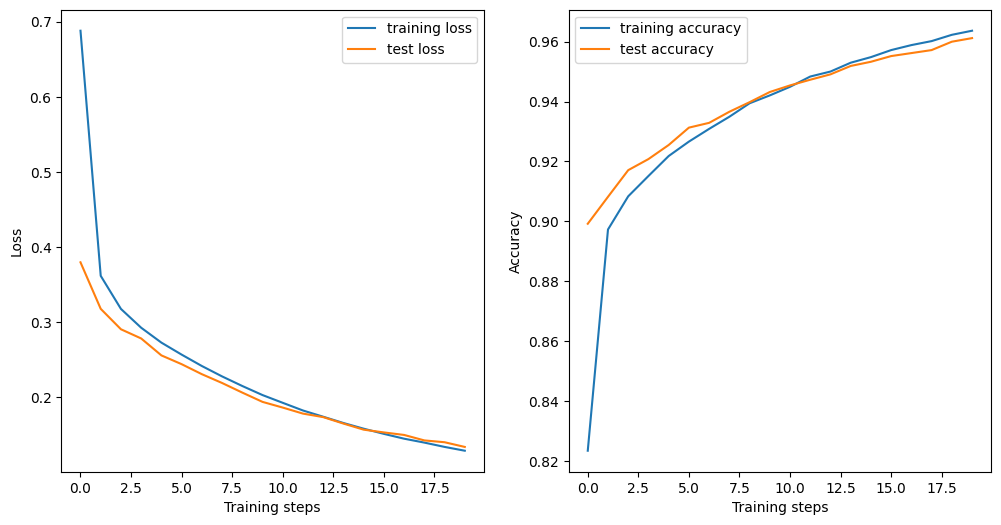

In [10]:
plot1 = {'x_values': [loss, test_loss], 'y_values': list(range(epochs)), 'legend': ["training loss", "test loss"], 'labels': ["Training steps", "Loss"]}
plot2 = {'x_values': [accuracy, test_accuracy], 'y_values': list(range(epochs)), 'legend': ["training accuracy", "test accuracy"], 'labels': ["Training steps", "Accuracy"]}
visualization([plot1,plot2])

In [11]:
#train model for ReLU and sigmoid activation functions and compare the results
loss_relu, test_loss_relu, accuracy_relu, test_accuracy_relu = train(layers_size, 'relu', epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size)
loss_sig, test_loss_sig, accuracy_sig, test_accuracy_sig = train(layers_size, 'sigmoid', epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size)


Epoch 1/20
200/200 [==============================] - 4s 15ms/step - loss: 0.6851 - categorical_accuracy: 0.8172 - val_loss: 0.3134 - val_categorical_accuracy: 0.9088
Epoch 2/20
200/200 [==============================] - 2s 12ms/step - loss: 0.2697 - categorical_accuracy: 0.9200 - val_loss: 0.2248 - val_categorical_accuracy: 0.9322
Epoch 3/20
200/200 [==============================] - 2s 12ms/step - loss: 0.2093 - categorical_accuracy: 0.9389 - val_loss: 0.1735 - val_categorical_accuracy: 0.9473
Epoch 4/20
200/200 [==============================] - 3s 13ms/step - loss: 0.1727 - categorical_accuracy: 0.9494 - val_loss: 0.1557 - val_categorical_accuracy: 0.9541
Epoch 5/20
200/200 [==============================] - 3s 14ms/step - loss: 0.1469 - categorical_accuracy: 0.9574 - val_loss: 0.1391 - val_categorical_accuracy: 0.9593
Epoch 6/20
200/200 [==============================] - 3s 17ms/step - loss: 0.1285 - categorical_accuracy: 0.9625 - val_loss: 0.1356 - val_categorical_accuracy: 0.959

<Figure size 640x480 with 0 Axes>

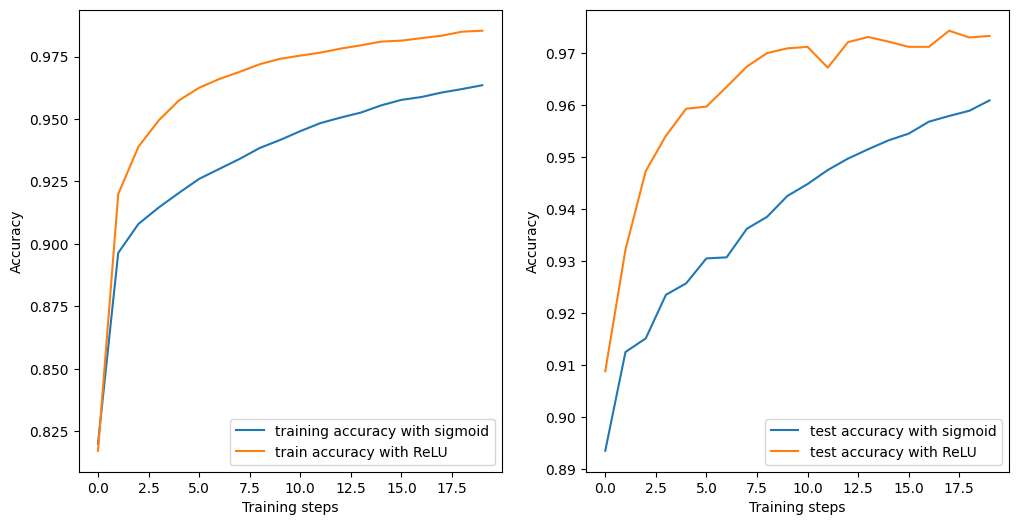

In [12]:
plot_train = {'x_values': [accuracy_sig, accuracy_relu], 'y_values': list(range(epochs)), 'legend': ["training accuracy with sigmoid", "train accuracy with ReLU"], 'labels': ["Training steps", "Accuracy"]}
plot_test = {'x_values': [test_accuracy_sig, test_accuracy_relu], 'y_values': list(range(epochs)), 'legend': ["test accuracy with sigmoid", "test accuracy with ReLU"], 'labels': ["Training steps", "Accuracy"]}
visualization([plot_train,plot_test])

In [39]:
#change the activation function to ReLU which had better results
activation = 'relu'

In [14]:
#train model with different number and sizes of layers
#generate lists of layer sizes with a constant value and 1 to 4 layers and train the model for them
layers_size_list_1 = [[256] * i for i in range(1,5)]
epochs = 10

losses_const = []
test_losses_const = []
accuracies_const = []
test_accuracies_const = []
for ls in layers_size_list_1:
  loss, test_loss, accuracy, test_accuracy = train(ls, activation, epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(),
                                                   keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size, verbose=0)
  print(f"training for {ls} is done")
  losses_const.append(loss)
  test_losses_const.append(test_loss)
  accuracies_const.append(accuracy)
  test_accuracies_const.append(test_accuracy)

training for [256] is done
training for [256, 256] is done
training for [256, 256, 256] is done
training for [256, 256, 256, 256] is done


In [15]:
#generate lists of layer sizes with values that have a geometric progression (on a log scale)
#and 1 to 4 layers and train the model for them
layers_size_list_2 = [list(np.geomspace(10, 784, i, dtype = int))[-2:0:-1] for i in range(3,7)]
epochs = 10

losses_geom = []
test_losses_geom = []
accuracies_geom = []
test_accuracies_geom = []
for ls in layers_size_list_2:
  loss, test_loss, accuracy, test_accuracy = train(ls, activation, epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(),
                                                   keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size, verbose=0)
  print(f"training for {ls} is done")
  losses_geom.append(loss)
  test_losses_geom.append(test_loss)
  accuracies_geom.append(accuracy)
  test_accuracies_geom.append(test_accuracy)

training for [88] is done
training for [183, 42] is done
training for [263, 88, 29] is done
training for [327, 136, 57, 23] is done


In [16]:
#generate lists of layer sizes with values that have a linear progression 
#and 1 to 4 layers and train the model for them
layers_size_list_3 = [list(np.linspace(10, 784, i, dtype = int))[-2:0:-1] for i in range(3,7)]
epochs = 10

losses_lin = []
test_losses_lin = []
accuracies_lin = []
test_accuracies_lin = []
for ls in layers_size_list_3:
  loss, test_loss, accuracy, test_accuracy = train(ls, activation, epochs, X_train, y_train, X_test, y_test, keras.losses.CategoricalCrossentropy(),
                                                   keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size, verbose=0)
  print(f"training for {ls} is done")
  losses_lin.append(loss)
  test_losses_lin.append(test_loss)
  accuracies_lin.append(accuracy)
  test_accuracies_lin.append(test_accuracy)

training for [397] is done
training for [526, 268] is done
training for [590, 397, 203] is done
training for [629, 474, 319, 164] is done


<Figure size 640x480 with 0 Axes>

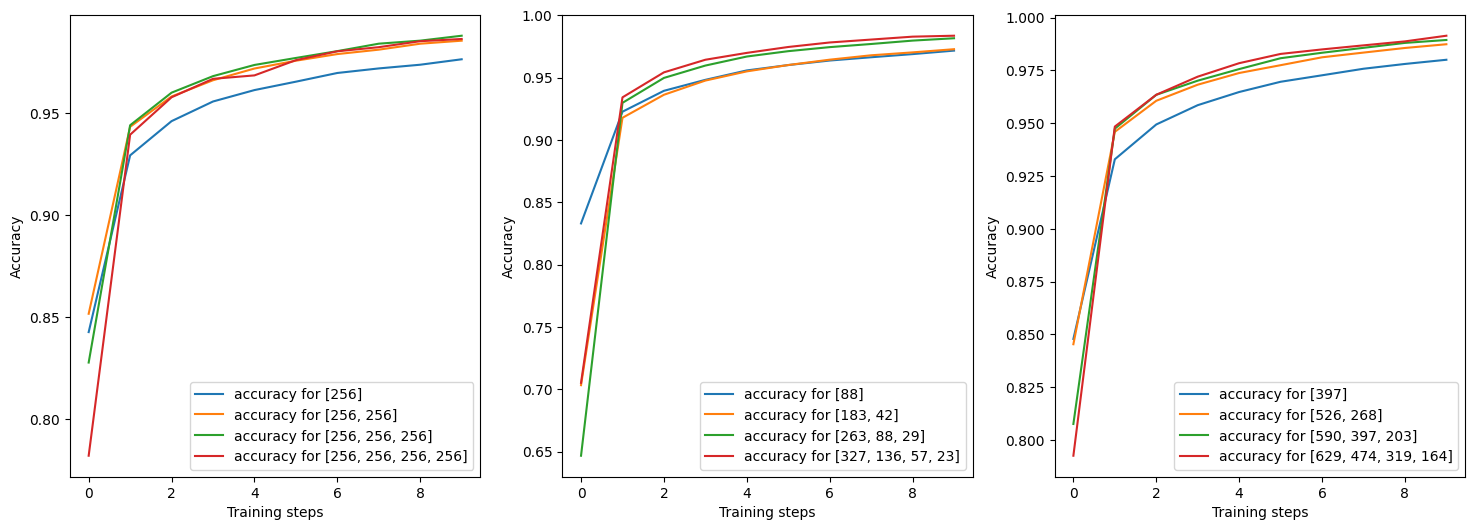

In [17]:
#compare the results of all the models above
plot1 = {'x_values': accuracies_const, 'y_values': list(range(epochs)), 'legend': [f"accuracy for {i}" for i in layers_size_list_1], 'labels': ["Training steps", "Accuracy"]}
plot2 = {'x_values': accuracies_geom, 'y_values': list(range(epochs)), 'legend': [f"accuracy for {i}" for i in layers_size_list_2], 'labels': ["Training steps", "Accuracy"]}
plot3 = {'x_values': accuracies_lin, 'y_values': list(range(epochs)), 'legend': [f"accuracy for {i}" for i in layers_size_list_3], 'labels': ["Training steps", "Accuracy"]}
visualization([plot1, plot2, plot3])

<Figure size 640x480 with 0 Axes>

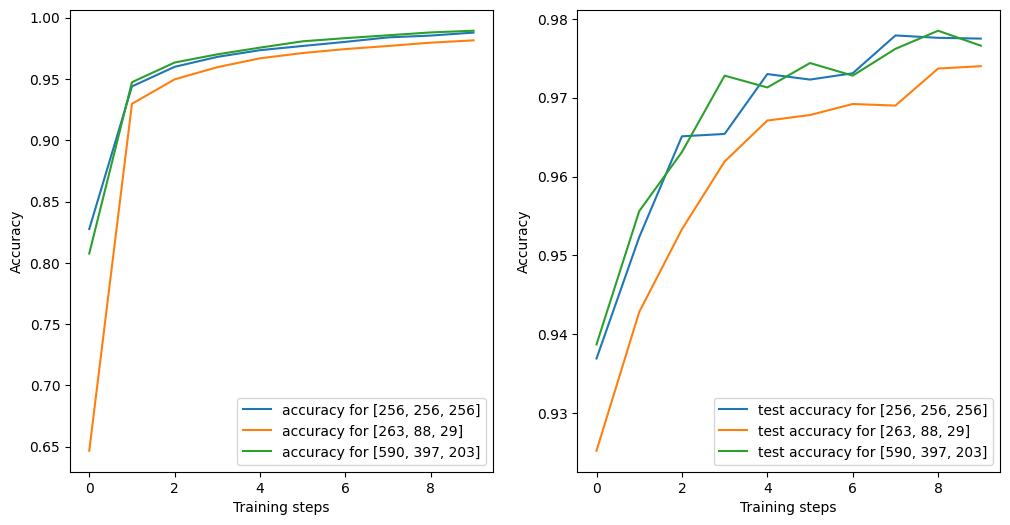

In [18]:
#compare ther results for models with 3 layers since they had the highest accuracies
plot1 = {'x_values': [accuracies_const[2], accuracies_geom[2], accuracies_lin[2]], 'y_values': list(range(epochs)),
         'legend': [f"accuracy for {i}" for i in [layers_size_list_1[2], layers_size_list_2[2], layers_size_list_3[2]]], 'labels': ["Training steps", "Accuracy"]}
plot2 = {'x_values': [test_accuracies_const[2], test_accuracies_geom[2], test_accuracies_lin[2]], 'y_values': list(range(epochs)),
         'legend': [f"test accuracy for {i}" for i in [layers_size_list_1[2], layers_size_list_2[2], layers_size_list_3[2]]], 'labels': ["Training steps", "Accuracy"]}

visualization([plot1, plot2])

In [40]:
#select the model with linear progression
layers_size =[590, 397, 203]

In [21]:
#generate lists of different learning rates (from 0.01 to 0.1) and momentums(from 0.1 to 1) and train the model for them
lr_list = [round(i,2) for i in np.linspace(0.01, 0.1, num=10)]
m_list = [round(i,2) for i in np.linspace(0.1, 1, num=10)]
epochs = 5

losses = []
test_losses = []
accuracies = []
test_accuracies = []
for lr in lr_list:
  losses.append([])
  test_losses.append([])
  accuracies.append([])
  test_accuracies.append([])
  for m in m_list:
    loss, test_loss, accuracy, test_accuracy = train(layers_size, activation, epochs, X_train, y_train, X_test, y_test,
                                                    keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(lr, m), batch_size=batch_size, verbose=0)
    print(f"training for learning rate {lr} and momentum {m} is done with accuracy {accuracy[-1]}")

    losses[-1].append(loss[-1])
    test_losses[-1].append(test_loss[-1])
    accuracies[-1].append(accuracy[-1])
    test_accuracies[-1].append(test_accuracy[-1])


training for learning rate 0.01 and momentum 0.1 is done with accuracy 0.9205499887466431
training for learning rate 0.01 and momentum 0.2 is done with accuracy 0.9239500164985657
training for learning rate 0.01 and momentum 0.3 is done with accuracy 0.9268500208854675
training for learning rate 0.01 and momentum 0.4 is done with accuracy 0.9311333298683167
training for learning rate 0.01 and momentum 0.5 is done with accuracy 0.93381667137146
training for learning rate 0.01 and momentum 0.6 is done with accuracy 0.9424999952316284
training for learning rate 0.01 and momentum 0.7 is done with accuracy 0.9500666856765747
training for learning rate 0.01 and momentum 0.8 is done with accuracy 0.9576166868209839
training for learning rate 0.01 and momentum 0.9 is done with accuracy 0.970966637134552
training for learning rate 0.01 and momentum 1.0 is done with accuracy 0.13635000586509705
training for learning rate 0.02 and momentum 0.1 is done with accuracy 0.9383166432380676
training for

Best learning rate: 0.06 Best momentum: 0.9


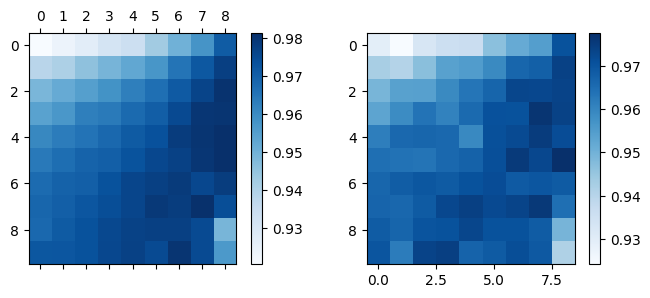

In [23]:
#remove the results for momentum=1 since accuracy was only around 10%
accuracies = np.array(accuracies)[:,:-1]
test_accuracies = np.array(test_accuracies)[:,:-1]

#plot the results and find the learning rate and momentum with the highest accuracy
fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
acc = ax1.matshow(accuracies, cmap='Blues', interpolation='none')
fig.colorbar(acc, ax=ax1)
test_acc = ax2.imshow(test_accuracies, cmap='Blues', interpolation='none')
fig.colorbar(test_acc, ax=ax2)

max_idx = np.unravel_index(accuracies.argmax(), accuracies.shape)
print(f"Best learning rate: {list(lr_list)[max_idx[0]]} Best momentum: {list(m_list)[max_idx[1]]}")

In [41]:
#update the learning rate and momentum
learning_rate = 0.06
momentum = 0.9

In [65]:
#test the model with different batch sizes from 200 to 1500 and additionally measure the training runtime
batch_size_list = [int(5 * np.ceil(x/5)) for x in np.geomspace(200, 1500, 10, dtype = int)]
epochs = 10
runtimes = []

losses = []
test_losses = []
accuracies = []
test_accuracies = []
for bs in batch_size_list:
  start_time = time.time()
  loss, test_loss, accuracy, test_accuracy = train(layers_size, activation, epochs, X_train, y_train, X_test, y_test,keras.losses.CategoricalCrossentropy(),
                                                   keras.optimizers.SGD(learning_rate, momentum), batch_size=bs, verbose=0)
  end_time = time.time()
  print(f"training for batch size {bs} is done")
  losses.append(loss[-1])
  test_losses.append(test_loss[-1])
  accuracies.append(accuracy[-1])
  test_accuracies.append(test_accuracy[-1])
  runtimes.append(end_time - start_time)

training for batch size 200 is done
training for batch size 250 is done
training for batch size 315 is done
training for batch size 395 is done
training for batch size 490 is done
training for batch size 615 is done
training for batch size 770 is done
training for batch size 960 is done
training for batch size 1200 is done
training for batch size 1500 is done


In [66]:
plot1 = {'x_values': [runtimes], 'y_values': list(batch_size_list), 'legend': ["runtime"], 'labels': ["Batch size", "Seconds"]}
plot2 = {'x_values': [accuracies, test_accuracies], 'y_values': list(batch_size_list), 'legend': ["training accuracy", "test accuracy"], 'labels': ["Batch size", "Accuracy"]}

<Figure size 640x480 with 0 Axes>

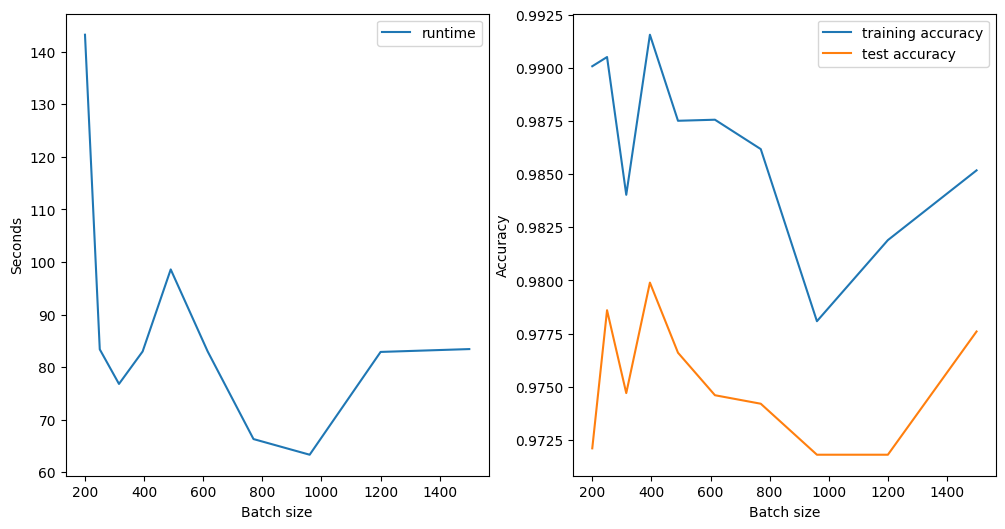

In [67]:
visualization([plot1,plot2])

In [73]:
#select a batch size with acceptable accuracy and lower runtime
batch_size = 700

In [74]:
#train the model for the new values
epochs = 10

start_time = time.time()
loss_new, test_loss_new, accuracy_new, test_accuracy_new = train(layers_size, activation, epochs, X_train, y_train, X_test, y_test,
                                                 keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(learning_rate, momentum), batch_size=batch_size)
end_time = time.time()
print("Runtime:", end_time - start_time)

Epoch 1/10
86/86 [==============================] - 8s 87ms/step - loss: 0.6741 - categorical_accuracy: 0.7903 - val_loss: 0.2199 - val_categorical_accuracy: 0.9316
Epoch 2/10
86/86 [==============================] - 8s 95ms/step - loss: 0.1843 - categorical_accuracy: 0.9420 - val_loss: 0.1348 - val_categorical_accuracy: 0.9572
Epoch 3/10
86/86 [==============================] - 6s 65ms/step - loss: 0.1228 - categorical_accuracy: 0.9620 - val_loss: 0.1144 - val_categorical_accuracy: 0.9648
Epoch 4/10
86/86 [==============================] - 8s 95ms/step - loss: 0.0988 - categorical_accuracy: 0.9690 - val_loss: 0.0959 - val_categorical_accuracy: 0.9693
Epoch 5/10
86/86 [==============================] - 7s 82ms/step - loss: 0.0793 - categorical_accuracy: 0.9750 - val_loss: 0.0980 - val_categorical_accuracy: 0.9697
Epoch 6/10
86/86 [==============================] - 6s 69ms/step - loss: 0.0716 - categorical_accuracy: 0.9770 - val_loss: 0.1145 - val_categorical_accuracy: 0.9648
Epoch 7/10

In [75]:
#train the model with the initial values
layers_size_init = [256]
activation_init = 'sigmoid'
learning_rate_init = 0.1
batch_size_init = 300
momentum_init = 0.5

start_time = time.time()
loss_init, test_loss_init, accuracy_init, test_accuracy_init = train(layers_size_init, activation_init, epochs, X_train, y_train, X_test, y_test,
                                                 keras.losses.CategoricalCrossentropy(), keras.optimizers.SGD(learning_rate_init, momentum_init), batch_size=batch_size_init)
end_time = time.time()
print("Runtime:", end_time - start_time)

Epoch 1/10
200/200 [==============================] - 3s 12ms/step - loss: 0.6909 - categorical_accuracy: 0.8225 - val_loss: 0.3809 - val_categorical_accuracy: 0.8949
Epoch 2/10
200/200 [==============================] - 2s 12ms/step - loss: 0.3605 - categorical_accuracy: 0.8980 - val_loss: 0.3174 - val_categorical_accuracy: 0.9103
Epoch 3/10
200/200 [==============================] - 2s 12ms/step - loss: 0.3161 - categorical_accuracy: 0.9089 - val_loss: 0.2954 - val_categorical_accuracy: 0.9174
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.2892 - categorical_accuracy: 0.9175 - val_loss: 0.2698 - val_categorical_accuracy: 0.9240
Epoch 5/10
200/200 [==============================] - 3s 17ms/step - loss: 0.2696 - categorical_accuracy: 0.9229 - val_loss: 0.2511 - val_categorical_accuracy: 0.9285
Epoch 6/10
200/200 [==============================] - 4s 18ms/step - loss: 0.2524 - categorical_accuracy: 0.9277 - val_loss: 0.2393 - val_categorical_accuracy: 0.931

<Figure size 640x480 with 0 Axes>

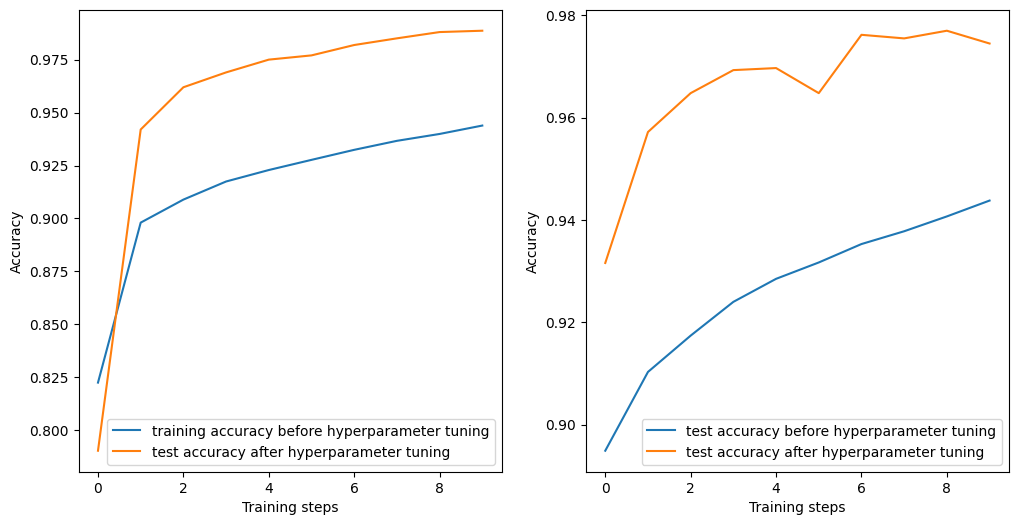

In [76]:
plot_init = {'x_values': [accuracy_init, accuracy_new], 'y_values': list(range(epochs)), 'legend': ["training accuracy before hyperparameter tuning", "test accuracy after hyperparameter tuning"], 'labels': ["Training steps", "Accuracy"]}
plot_new = {'x_values': [test_accuracy_init, test_accuracy_new], 'y_values': list(range(epochs)), 'legend': ["test accuracy before hyperparameter tuning", "test accuracy after hyperparameter tuning"], 'labels': ["Training steps", "Accuracy"]}
visualization([plot_init,plot_new])